# Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the 

Here are a few questions that this project will seek to answer:
+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ Does a higher GDP mean a higher life expectancy?
+ What is the distribution of that life expectancy and GDP of a country?


**Data sources**
- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)



In [1]:
#import necessary libraries for project 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Explore the Data

In [2]:
#turn csv file into a dataframe
df = pd.read_csv('all_data.csv')

#examine first 5 rows of dataframe
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [3]:
#rename column life expectancy at birth (years)
df.rename(columns={'Life expectancy at birth (years)': 'LEABY'}, inplace=(True))

#convert GDP to trillions
df['GDP'] = df.GDP/1000000000000

#examine columns or missing values 
print(df.info())

print('Null Values: \n' + str(df.isnull().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  96 non-null     object 
 1   Year     96 non-null     int64  
 2   LEABY    96 non-null     float64
 3   GDP      96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
Null Values: 
Country    0
Year       0
LEABY      0
GDP        0
dtype: int64


In [4]:
print(df.describe(),'\n')

              Year      LEABY        GDP
count    96.000000  96.000000  96.000000
mean   2007.500000  72.789583   3.880499
std       4.633971  10.672882   5.197561
min    2000.000000  44.300000   0.004416
25%    2003.750000  74.475000   0.173302
50%    2007.500000  76.750000   1.280220
75%    2011.250000  78.900000   4.067510
max    2015.000000  81.000000  18.100000 



In [5]:
#print unique variables for countries and years

print('Countries: \n' ,df.Country.unique(), '\n')
print('Years: \n' ,df.Year.unique())

Countries: 
 ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe'] 

Years: 
 [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


## Visualize The Data

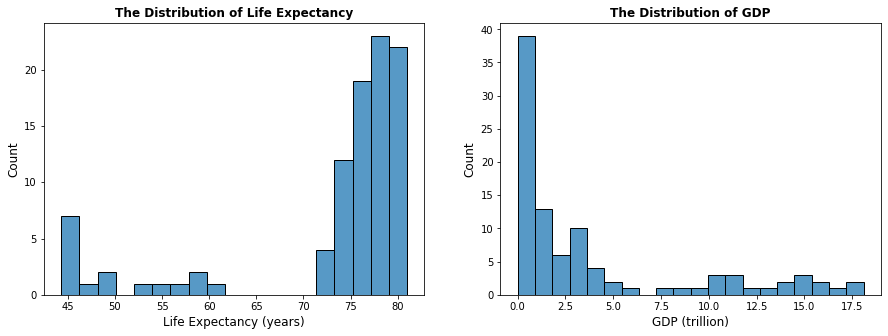

<Figure size 432x288 with 0 Axes>

In [6]:
#show a distribution of GDP and Life Expectancy 

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15,5))

ax = sns.histplot(data=df.LEABY, ax=axs[0])
ax.set_title('The Distribution of Life Expectancy', weight='bold')
ax.set_xlabel('Life Expectancy (years)', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

sns.histplot(data=df.GDP, ax=axs[1], bins=20)
plt.title('The Distribution of GDP', weight='bold')
plt.xlabel('GDP (trillion)', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()
plt.clf()


The life expectancys distrubiton plot shows that 70-85 years is an expected life expectancy for the average person living in any of these countries. However There are outlies between 45 and 60 making this this distribution left skewed where the mean is less than the median. 
The GDP is right skewed with most of the data being under 5 billion. 

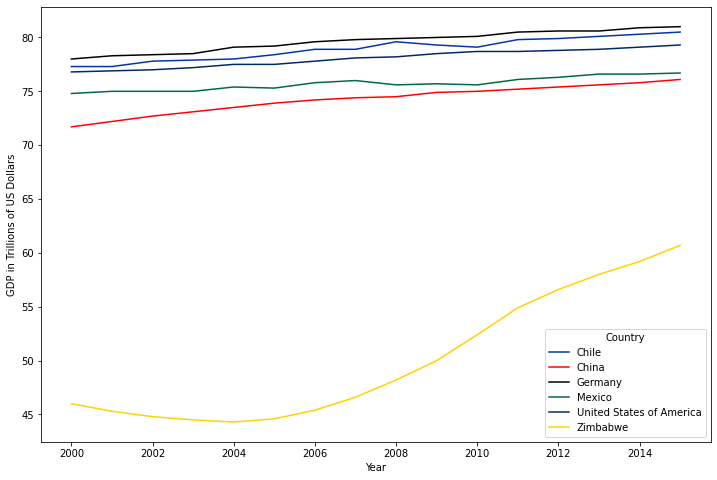

<Figure size 432x288 with 0 Axes>

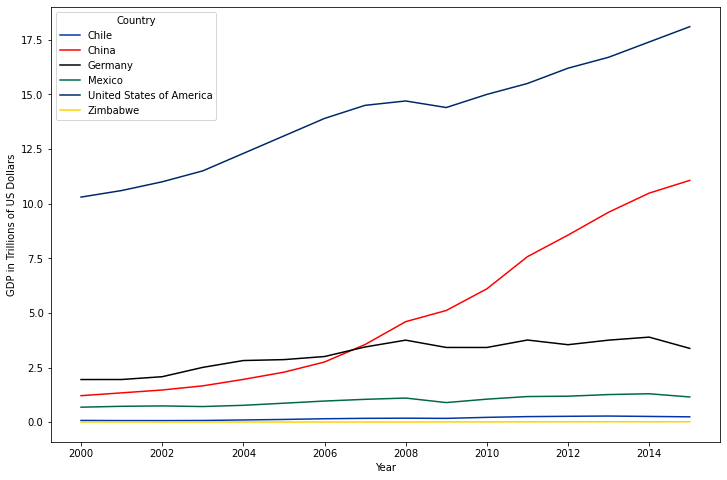

<Figure size 432x288 with 0 Axes>

In [7]:
#create color dictionary 
color_set = {
    'United States of America':'#002868', 'China':'#FF0000', 'Germany':'#000000', 'Mexico':'#006847', 'Chile':'#0036a7', 'Zimbabwe':'#FFD200'
}

#Show progression of GDP and Life Expectancy over time 

plt.figure(figsize=[12,8])
ax = sns.lineplot(x='Year', y= 'LEABY', data=df ,hue='Country', palette=color_set)
ax.set_ylabel('GDP in Trillions of US Dollars')
plt.show()
plt.clf()

plt.figure(figsize=[12,8])
ax = sns.lineplot(x='Year', y= 'GDP', data=df ,hue='Country', palette=color_set)
ax.set_ylabel('GDP in Trillions of US Dollars')
plt.show()
plt.clf()

Zimbabwe shows the most significant growth in life expectency after birth from 46 to 60 years old, having a 14 year increase in the span of 15 years. Excluding Zimbabwe, China has the lowest life expectancy through the years and shows the most growth and Germany has had the highest life expectancy through the years. 
USA and China shows the most signifcant growth in this time. China moving from 1.5 to 10 trillion dollars in GDP and the US moving from 10 to 17.5trillion. The GDP of Zimbabwe and Chile seems to be relatively flat even though Zimbabwe had the most significant growth in life expectancy. 

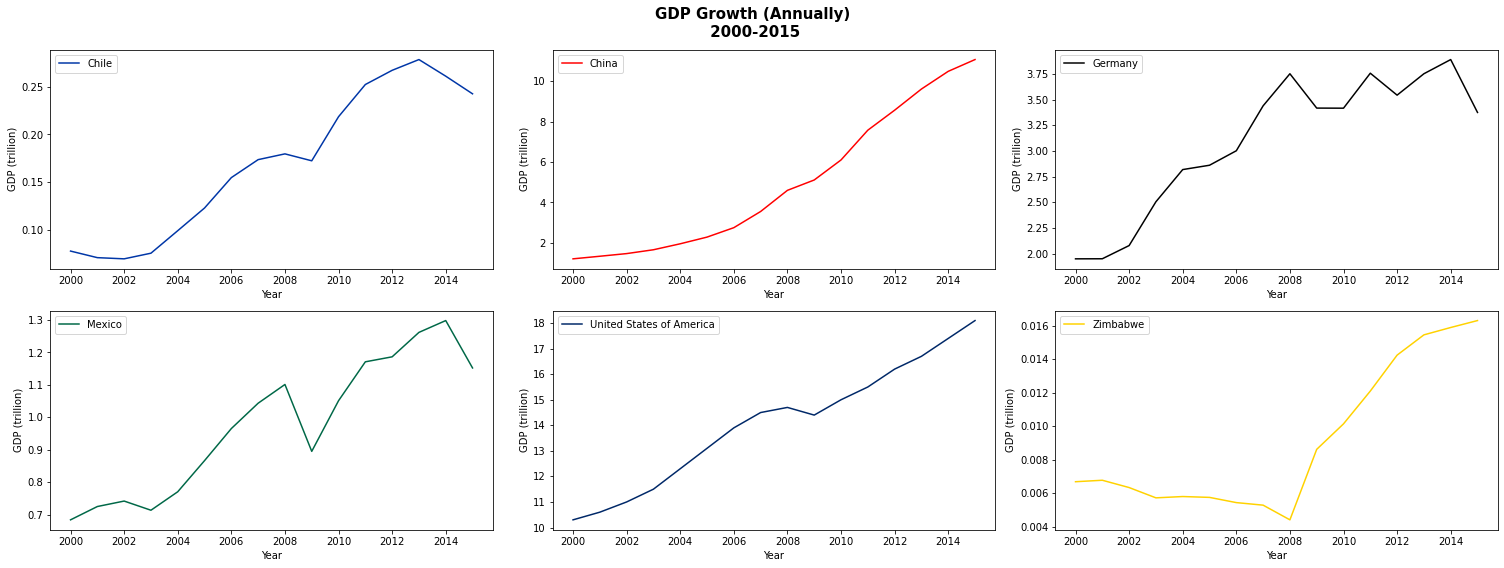

<Figure size 432x288 with 0 Axes>

In [8]:
# plot a line graph for each coutnry showing the GDP growth of countries. 

plt.figure(figsize=(21,8))
i = 1
for country in df.Country.unique():
    plt.subplot(2,3,i)
    sns.lineplot(x='Year', y='GDP', data=df[df.Country == country], label=country, color=color_set.get(country))
    plt.xlabel('Year', fontsize=10)
    plt.ylabel('GDP (trillion)', fontsize=10)
    i += 1
plt.suptitle(t='GDP Growth (Annually)\n 2000-2015', weight='bold', size=15)
plt.tight_layout()
plt.show()
plt.clf()

All countries show overall growth in the period 15 years. In the previous chart the countries except USA and China did not show any growth because their GDP was much smaller compared to the United States'. 

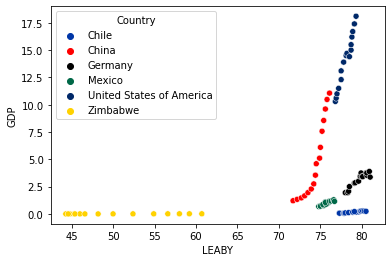

<Figure size 432x288 with 0 Axes>

In [9]:
#plot scatterplot includeing all countries

sns.scatterplot(x=df.LEABY, y=df.GDP, hue=df.Country, palette=color_set)
plt.show()
plt.clf()

Zimbabwe seems to remain flat as life expectancy increases . WHile there is a dramatic increase in GDP of both the US and China as life expectancy increases. 

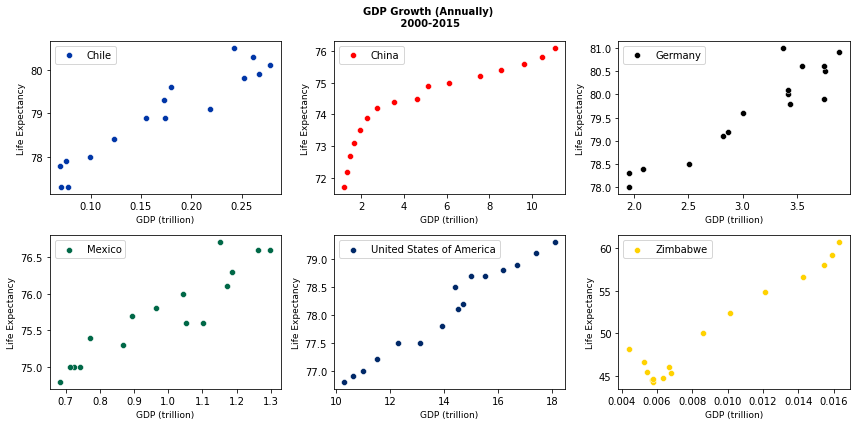

<Figure size 432x288 with 0 Axes>

In [10]:
#plot scatterplot for each country

plt.figure(figsize=(12,6))
i = 1
for country in df.Country.unique():
    plt.subplot(2,3,i)
    sns.scatterplot(x='GDP', y='LEABY', data=df[df.Country == country], color=color_set.get(country), label=country)
    plt.ylabel('Life Expectancy', fontsize=9)
    plt.xlabel('GDP (trillion)', fontsize=9)
    i += 1
plt.suptitle(t='GDP Growth (Annually)\n 2000-2015', weight='bold', size=10)
plt.tight_layout()
plt.show()
plt.clf()

All countries seem to show a positive correlation for the relationship between GDP and Life Expectancy. 

## Conculsions

This project was able to make quite a few data visualizations with the data even though there were only 96 rows and 4 columns. 

The project was also able to answer some of the questions posed in the beginning:

- Has life expectancy increased over time in the six nations?
    - Yes with Zimbabwe having the greatest increase.
- Has GDP increased over time in the six nations?
    - GDP has also increased for all countries in our list, especially for China.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes there is a positive correlation between GDP and life expectancy for countries in our list.
- Does an higher GDP mean a higher life expectancy? 
    - A country with a higher GDP can expect a higher life expectancy seeing that they have a positive correlation but a country's GDP does not determine if its life expectnacy will be higher than a country with a lower GDP. Germany and Chile has a higher life expectancy than the US and China  even though they have a signifcantly larger GDP.
- What is the distribution of that life expectancy?
    - the life expectancy had a left skew, or most of the observations were on the right side.